In [0]:
# Linear Regression: y = mx + b, where m is the best fit slope and b is y-intercept
# regression line (y) = mx + b
# m = ( (mean(x) * mean(y)) - (mean(x *y)) ) / ( (mean(x))^2 - mean(x^2) )
# b = ( mean(y) ) - ( m * mean(x) )
# Error is the distance between the x plot to the regression line, can be determined by SE (Squared Error)
# SE = sum((y line - actual y) ^ 2)
# R^2 = 1 - ( (SE y_prediction) / (SE mean(y)) ), to determine the coeficient of determination 

In [0]:
import random 
from statistics import mean
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [0]:
Xs = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
Ys = np.array([5, 4, 6, 5, 6, 7], dtype = np.float64)

In [0]:
def create_dataset(data_length, variance, step = 2, correlation = False):
  value = 1
  Ys = []

  for i in range(data_length):
    y = value + random.randrange(-variance, variance)
    Ys.append(y)

    if correlation and correlation == 'positive':
      value += step
    
    if correlation and correlation == 'negative':
      value -= step

  Xs = [i for i in range(len(Ys))]

  return np.array(Xs, dtype = np.float64), np.array(Ys, dtype = np.float64)

def best_fit_slope_and_intercept(Xs, Ys):
  m = ( (mean(Xs) * mean(Ys)) - (mean(Xs * Ys)) ) / ( (mean(Xs) ** 2) - (mean(Xs ** 2)) ) 
  b = ( mean(Ys) ) - ( m * mean(Xs) )

  return m, b

def squared_error(actual_Ys, Ys_line):
  return sum((Ys_line - actual_Ys) ** 2)

def coeficient_of_determination(actual_Ys, Ys_line):
  y_mean_line = [mean(actual_Ys) for y in actual_Ys]
  squared_error_regerssion = squared_error(actual_Ys, Ys_line)
  squared_error_y_mean = squared_error(actual_Ys, y_mean_line)

  return 1 - (squared_error_regerssion / squared_error_y_mean)

In [0]:
Xs, Ys = create_dataset(80, 20, 2, correlation = 'positive')

In [78]:
m, b = best_fit_slope_and_intercept(Xs, Ys)

m, b

(2.0760431317393344, -1.7787037037037123)

In [0]:
regression_line = [(m * x) + b for x in Xs]

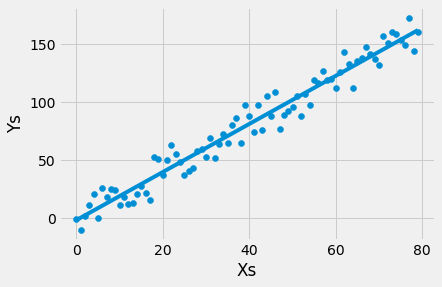

In [80]:
plt.scatter(Xs, Ys)

plt.plot(Xs, regression_line)

plt.xlabel('Xs')
plt.ylabel('Ys')

plt.show()

In [0]:
predict_x = 8
predict_y = (m * predict_x) + b

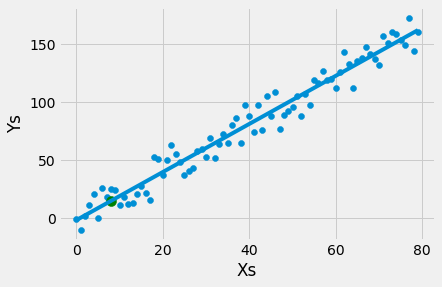

In [82]:
plt.scatter(Xs, Ys)
plt.scatter(predict_x, predict_y, s = 100, color = 'green')

plt.plot(Xs, regression_line)

plt.xlabel('Xs')
plt.ylabel('Ys')

plt.show()

In [83]:
r_squared = coeficient_of_determination(Ys, regression_line)

print(r_squared)

0.9581373860123801
